In [1]:
## import packaget, libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
## load csv file into a dataframe
bestbet_all = pd.read_csv('/home/data_ap/hobbyprojects/bestbet/all_data.csv', delimiter = ';', 
                          names = ['my_date', 'game_id', 'round_id', 'risked_money', 'expected value', 'multipliers', 'chance_of_winning', 'did_they_win', 'how_much', 'new_stack'])

In [5]:
bestbet_all.head()

,my_date,game_id,round_id,risked_money,expected value,multipliers,chance_of_winning,did_they_win,how_much,new_stack
0,2020-09-03,game_2,1,1,0.30,1.8,16,False,0,9999
1,2020-09-03,game_2,2,1,0.94,9.4,10,False,0,9998
2,2020-09-03,game_2,3,1,1.74,3.2,55,False,0,9997
3,2020-09-03,game_2,4,1,1.15,5.2,22,True,5,10001
4,2020-09-03,game_2,5,11,0.84,5.9,14,True,64,10054


In [17]:
## how many games are played per day 
games_per_day = bestbet_all.groupby('my_date').count()[['game_id']]
## rename user_id column to a more meaningful one
games_per_day.rename(columns = {'game_id': 'games_per_day'}, inplace= True)
games_per_day.reset_index().head()


,my_date,games_per_day
0,2020-09-03,50
1,2020-09-04,600
2,2020-09-05,1900
3,2020-09-06,50
4,2020-09-07,150


In [25]:
# divide by 50 because 1 game is 50 round
games_per_day = games_per_day/50

([<matplotlib.axis.XTick at 0x7f3fb69c4f60>,
 <a list of 5 Text xticklabel objects>)

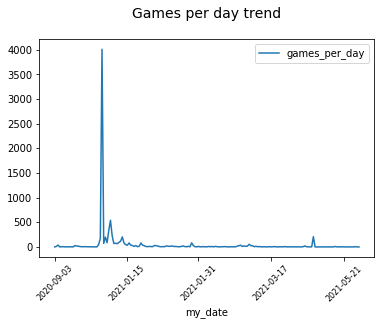

In [26]:
## show the games/days trend - one case over 4000 games one that game

games_per_day.plot()
plt.title('Games per day trend', y = 1.07, fontsize = 14)
## show a couple of dates on x axis
plt.xticks([0, 43, 85, 128, 171], ['2020-09-03', '2021-01-15','2021-01-31', '2021-03-17','2021-05-21'], fontsize = 8, rotation = 45)


Text(0.5,1.07,'Games per day distribution')

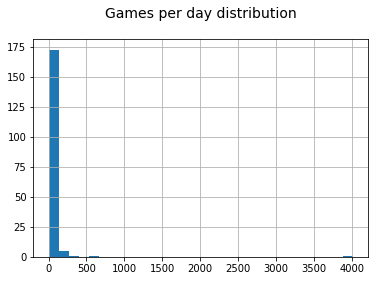

In [27]:
## distribution showing the scores - on one day is over 4000, but mostly around and under 500 games per day
games_per_day.hist(bins = 30)
plt.title('Games per day distribution', y = 1.07, fontsize = 14)

In [7]:
## avarege number of games (mean) - moch more then the median, because of the one day with 4000 (!) games
games_per_day.mean()

games_per_day    2247.585635
dtype: float64

In [8]:
## avarege number of games (median) 
games_per_day.median()

games_per_day    250.0
dtype: float64

In [9]:
##How many games were played?
all_num_of_games = bestbet_all.groupby('game_id').count().count().my_date
all_num_of_games

8831

In [10]:
## How many games ended with the player losing (score went down to 0)?
all_games_with_0 = bestbet_all[bestbet_all.new_stack == 0].groupby('game_id').count().count().new_stack
all_games_with_0

1219

In [11]:
# count percentage
all_games_with_0/all_num_of_games *100

13.803646246178236

In [12]:
## What's the average (mean) score? How many people are below and above the average?
## 1. avarage
bestbet_score_mean = bestbet_all[bestbet_all.round_id == 50].new_stack.mean()

In [13]:
bestbet_score_mean

62004941.77995643

In [14]:
## 2 How many people are below the avarage - about 7800 games(people) are below 

In [15]:
scores = bestbet_all[bestbet_all.round_id == 50][['new_stack']].sort_values('new_stack')

below_mean = scores[scores.new_stack < bestbet_score_mean].count()
below_mean

new_stack    7784
dtype: int64

In [16]:
## 3 How many people are above the avarage -  19 games(people) are above -> much more are above the avarage (mean)
above_mean = scores[scores.new_stack > bestbet_score_mean].count()
above_mean

new_stack    19
dtype: int64

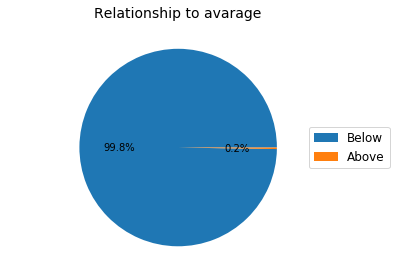

In [17]:
## Pie chart (below/above) - tiny part of the scores are above the avarage which is a quite high number
numbers = [7777, 19]

my_labels = 'Below','Above'
plt.pie(numbers,autopct='%1.1f%%')
plt.title('Relationship to avarage', y = 1.07, fontsize = 14)
plt.legend(labels = my_labels, bbox_to_anchor = (1.15, 0.5), loc = 'right', fontsize = 12)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


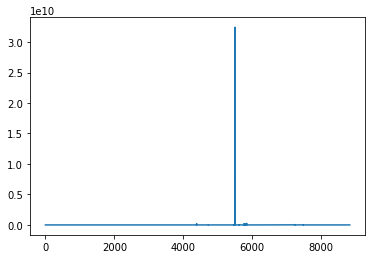

In [18]:
## Plot the average stack per round on a chart!  - there is an outstanding value about 5000 game_id
   ## 1. solution: avarage stack: sum 50 rounds new stack/50
    
## replace 'game_x' to 'x' and convert to integer datatype
bestbet_all_game_id_mod = bestbet_all.assign(game_id = lambda x: x['game_id'].str.extract('(\d+)'))
tmp = bestbet_all_game_id_mod[['game_id', 'new_stack']].groupby('game_id').sum()/50
tmp = tmp.reset_index(drop = False)
tmp['game_id'] = tmp['game_id'].astype(int)
avarage_stack_per_round = tmp.sort_values('game_id')

## drop original index and rename new_stack > avarage_stack
avarage_stack_per_round = avarage_stack_per_round.reset_index(drop = True)
avarage_stack_per_round = avarage_stack_per_round.rename(columns={'new_stack': 'avarage_stack'})

## plotting
avarage_stack_per_round.avarage_stack.plot()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


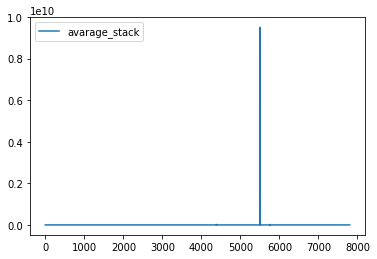

In [30]:
## 2. solution: avarage stack = 50. new stack - 10000 (initial) /50  - same reasult as by the 1. solution
avarage_stack_per_round_2 = bestbet_all[bestbet_all.round_id == 50]
avarage_stack_per_round_2[['game_id', 'new_stack']]

## subtract 10000 which is the initial money
def subtract_10000(stack):
    return stack-10000

avarage_stack_per_round_2['new_stack'] = avarage_stack_per_round_2['new_stack'].apply(subtract_10000)

## divide by 50 to get the avarage per round
def divide_50(stack):
    return stack/50

avarage_stack_per_round_2['new_stack'] = avarage_stack_per_round_2['new_stack'].apply(divide_50)

## rename new_stack > avarage_stack
avarage_stack_per_round_2 = avarage_stack_per_round_2.rename(columns={'new_stack': 'avarage_stack'})
avarage_stack_per_round_2[['game_id', 'avarage_stack']].reset_index(drop = True).plot()


In [20]:
## avarage win/round    

##with 0's
win_per_round_all = bestbet_all.fillna('unknown')
win_per_round_all = bestbet_all[['how_much']].mean()
win_per_round_all

how_much    2.777535e+06
dtype: float64

In [21]:
## without 0's
win_per_round = bestbet_all.fillna('unknown')
win_per_round = bestbet_all[win_per_round.how_much > 0]
win_per_round = win_per_round[['how_much']].mean()
win_per_round

how_much    8.385809e+06
dtype: float64

In [22]:
## ratio between with 0's and without 0's
win_per_round/win_per_round_all

how_much    3.019155
dtype: float64

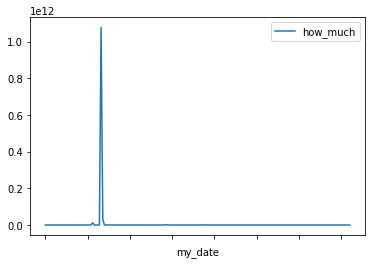

In [23]:
## avarage win/day 
avarage_win_day = bestbet_all[['my_date', 'how_much']].groupby('my_date').sum().plot()
avarage_win_day


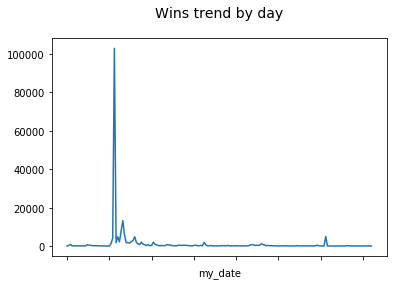

In [27]:
## win/not win trends/day

wins_per_day = bestbet_all[bestbet_all.did_they_win == True]
plt.title('Wins trend by day', y = 1.07, fontsize = 14)
wins_per_day.groupby('my_date').count().did_they_win.plot()

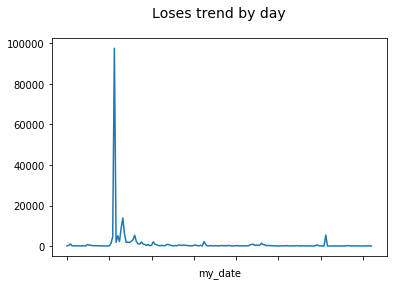

In [28]:
not_wins_per_day = bestbet_all[bestbet_all.did_they_win == False]
plt.title('Loses trend by day', y = 1.07, fontsize = 14)
not_wins_per_day.groupby('my_date').count().did_they_win.plot()